In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('netflix.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df=df[['type','title','rating','duration','description','listed_in','release_year']]#these are all relevent columns

In [9]:
df=df.dropna (subset=['rating','listed_in','duration'])#dropping the irrelevent columns

In [10]:
df['duration'].head()

0    4 Seasons
1       93 min
2       78 min
3       80 min
4      123 min
Name: duration, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7780 entries, 0 to 7786
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7780 non-null   object
 1   title         7780 non-null   object
 2   rating        7780 non-null   object
 3   duration      7780 non-null   object
 4   description   7780 non-null   object
 5   listed_in     7780 non-null   object
 6   release_year  7780 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 486.2+ KB


In [12]:
df['duration']=df['duration'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vaidi_4nvbk5v\AppData\Local\Temp\ipykernel_3476\1981906552.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration']=df['duration'].str.extract('(\d+)')


In [13]:
df['duration'].head()

0      4
1     93
2     78
3     80
4    123
Name: duration, dtype: object

In [14]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
map_rating={'PG-13':0, 'TV-MA':1, 'PG':2, 'TV-14':3, 'TV-PG':4, 'TV-Y':5, 'TV-Y7':6, 'R':7,
       'TV-G':8, 'G':9, 'NC-17':10, 'NR':11, 'TV-Y7-FV':12, 'UR':13}
df['rating']=df['rating'].map(map_rating).fillna(0)

In [16]:
df['rating'].head(100)

0      1
1      1
2      7
3      0
4      0
      ..
96     0
97     1
98     0
99     4
100    0
Name: rating, Length: 100, dtype: int64

In [17]:
#one hot encoding genras
genres=df['listed_in'].str.get_dummies(',')
df=pd.concat([df,genres],axis=1)

In [18]:
#select features for clustering
features=['release_year','duration','rating']+genres.columns.tolist()
X=df[features]

In [19]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'rating' is the column with 'TV-MA'
le = LabelEncoder()
X['rating'] = le.fit_transform(X['rating'])

C:\Users\vaidi_4nvbk5v\AppData\Local\Temp\ipykernel_3476\2010723889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rating'] = le.fit_transform(X['rating'])


In [20]:
#implement standardscaler for k means clustering
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

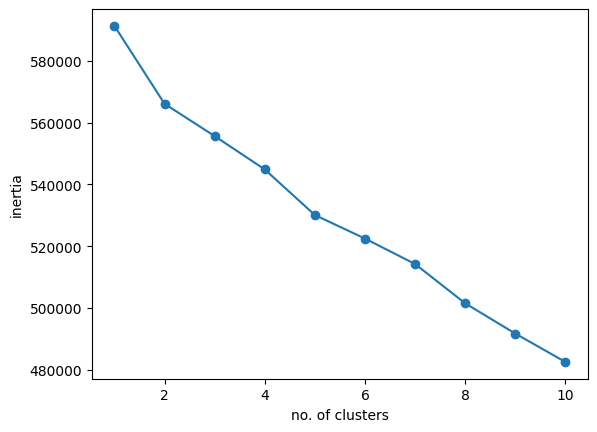

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42, n_init=20)
  kmeans.fit(X_scaled)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias,marker='o')
plt.xlabel('no. of clusters')
plt.ylabel('inertia')
plt.show()

In [35]:
#applying k means clustering
kmeans=KMeans(n_clusters=4,random_state=42)
df['cluster']=kmeans.fit_predict(X_scaled)


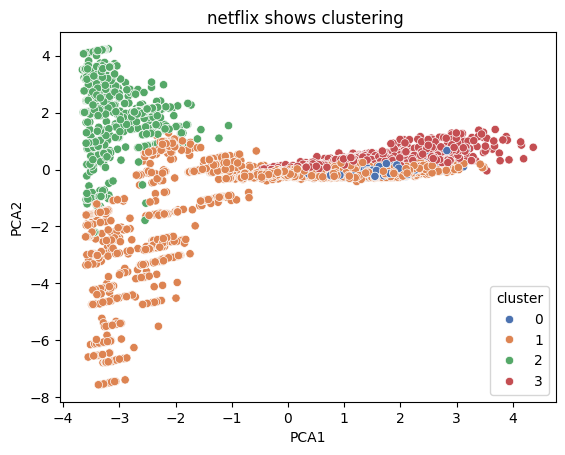

In [36]:
#visualize clusters
from sklearn.decomposition import PCA
import seaborn as sns

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
df['PCA1']=X_pca[:,0]
df['PCA2']=X_pca[:,1]

sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=df,palette='deep')
plt.title('netflix shows clustering ')
plt.show()

First, I will save the trained `kmeans` model and the `scaler` object using `joblib`. You might need to install `joblib` if you don't have it.